# 머신러닝 상품화 - 여정1
## # Data Preparation

- Data 수집 (정형/비정형/반정형)
- Data 유형에 따른 처리
- Data Sampling
- Labeling
- Class Imbalance 고려

In [1]:
import pandas as pd
import numpy as np
import os

import json
from PIL import Image

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

import matplotlib.pyplot as plt
import seaborn as sns

base_path = os.getcwd()

### 1. 데이터 수집 및 유형 확인- 정형데이터
- 구조화된 데이터로 표(table) 형태로 표현되며 고정된 스키마를 갖음
- 데이터 베이스, 스프레드시트 및 CSV 파일과 같은 데이터 소스에서 얻음

In [2]:
file_path = os.path.join(base_path, "data/winequality.csv")
df = pd.read_csv(file_path)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 1. 데이터 수집 및 유형 확인 - 반정형 데이터
- 구조가 명확하게 정의되지 않은 데이터로 일부 구조화된 정보를 갖음
- XML, JSON, HTML과 같은 마크업 언어를 사용하여 주로 표현

In [3]:
# 샘플 JSON 데이터
data_str = """{
    "employees": [
        {"name": "Alice", "age": 28, "occupation": "Engineer"},
        {"name": "Bob", "age": 24, "occupation": "Data Scientist"},
        {"name": "Charlie", "age": 22, "occupation": "Designer"}
    ]
}"""

data = json.loads(data_str)
for employee in data["employees"]:
    print(employee)

{'name': 'Alice', 'age': 28, 'occupation': 'Engineer'}
{'name': 'Bob', 'age': 24, 'occupation': 'Data Scientist'}
{'name': 'Charlie', 'age': 22, 'occupation': 'Designer'}


In [4]:
# 자유로운 데이터 추가
data["employees"][0]["income"] = 10000
print('# Alice에게 추가한 income 확인 \n{}'.format(data["employees"][0]))

# Alice에게 추가한 income 확인 
{'name': 'Alice', 'age': 28, 'occupation': 'Engineer', 'income': 10000}


In [5]:
print('# 반정형 데이터를 정형 데이터로 변환')
pd.DataFrame(data['employees'])

# 반정형 데이터를 정형 데이터로 변환


,name,age,occupation,income
0,Alice,28,Engineer,10000.0
1,Bob,24,Data Scientist,NaN
2,Charlie,22,Designer,NaN


### 1. 데이터 수집 및 유형 확인 - 비정형 데이터
- 구조가 없거나 매우 제한적인 구조를 가지지 않는 데이터로 텍스트, 이미지, 오디오, 비디오 같은 형태를 갖음

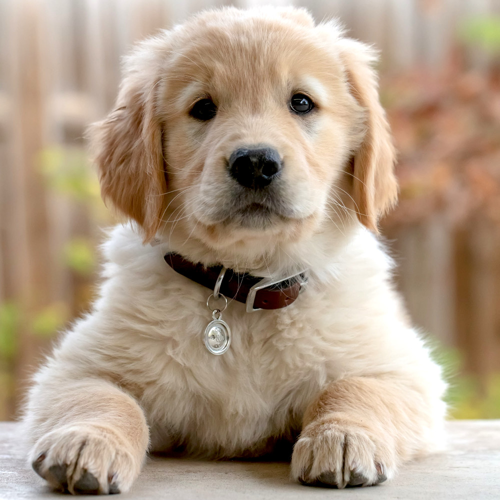

In [6]:
# 이미지 데이터
img = Image.open(base_path + "/data/dog_sample_image.jpeg")

# 이미지 축소 (반으로 축소)
width, height = img.size
shrinked_image = img.resize((width // 2, height // 2))
shrinked_image

### 2. 데이터 샘플링

- 큰 데이터 집합에서 작은 부분 집합을 추출하는 프로세스
- 통계 및 데이터 분석 분야에서 사용되는 일반적인 기술로, 데이터의 일부를 조사하고 전체 데이터 집합에 대한 결론을 도출하는데 활용
- 전체 데이터 셋에 대한 통찰력을 얻거나 계산/저장 공간을 줄이는데 도움

In [7]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2. 데이터 샘플링 - 랜덤
- 무작위로 데이터 집합에서 샘플을 선택하는 방법
- 각 데이터 포인트가 선택될 확률은 동일하며,편향이 적게 대표성 있는 샘플을 얻을 수 있음

In [8]:
# 무작위로 10개의 데이터 선택
random_samples = df.sample(n=5)
random_samples

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5114,red,8.7,0.625,0.16,2.0,0.101,13.0,49.0,0.99620,3.14,0.57,11.0,5
2831,white,6.6,0.450,0.43,7.2,0.064,31.0,186.0,0.99540,3.12,0.44,9.4,5
3929,white,6.6,0.320,0.47,15.6,0.063,27.0,173.0,0.99872,3.18,0.56,9.0,5
5327,red,12.8,0.840,0.63,2.4,0.088,13.0,35.0,0.99970,3.10,0.60,10.4,6
4461,white,7.7,0.280,0.24,2.4,0.044,29.0,157.0,0.99312,3.27,0.56,10.6,6


### 2. 데이터 샘플링 - 층화

- 데이터를 계층적으로 분류한 후, 각 계층에서 샘플을 추출하는 방법
- 각 계층의 특성을 고려하여 샘플을 얻기 위해 사용
- 예를 들어, 남성과 여성의 성별에 따라 샘플을 추출할 때 사용

In [9]:
# 'type' 컬럼을 기준으로 층화 샘플링
train, test = train_test_split(df, test_size=0.4, stratify=df['type'])
print("# red 내에서 60% 추출 \n  {} x {} = {}".format('1599','0.6',1599*0.6))
print()
print('# raw data의 type에 따른 데이터 수')
print(df.groupby(['type'])['quality'].count())
print()
print('# 층화 샘플링 data의 type에 따른 데이터 수')
print(train.groupby(['type'])['quality'].count())



# red 내에서 60% 추출 
  1599 x 0.6 = 959.4

# raw data의 type에 따른 데이터 수
type
red      1599
white    4898
Name: quality, dtype: int64

# 층화 샘플링 data의 type에 따른 데이터 수
type
red       959
white    2939
Name: quality, dtype: int64


### 2. 데이터 샘플링 - 클러스터링
- 데이터를 여러 그룹 또는 cluster로 나누고, 몇 개의 cluster를 무작위로 선택한 후 선택된 cluster 내의 모든 데이터를 포함하는 방법
- 데이터가 고루 분포되지 않은 경우에 유용
- 데이터가 클러스터로 그룹화 될 때 사용

In [10]:
# Alcohol 기준으로 클러스터링
df['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [11]:
df['cluster'] = pd.cut(df['alcohol'], bins=[8, 10, 12, 14, 16], labels=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])

# 무작위로 클러스터 선택
selected_cluster = np.random.choice(df['cluster'].unique())

cluster_samples = df[df['cluster'] == selected_cluster]
cluster_samples

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
3918,white,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7,cluster_4
4503,white,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7,cluster_4
5550,red,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5,cluster_4


### 2. 데이터 샘플링 - 가중치

- 데이터 포인트에 가중치를 할당하고 이러한 가중치를 기반으로 샘플을 추출하는 방법
- 데이터 포인트에 할당된 가중치는 해당 데이터 포인트의 중요성을 나타내며, 중요한 데이터는 더 자주 선택될 가능성이 높음
- 불균형 데이터 분포를 가진경우 잘 활용됨 (이상치 탐지나 희귀 이벤트 분석과 같이 minor class data가 매우 적은 경우)


In [ ]:
# random으로 각 row에 가중치 생성 및 10개 추출
weights = np.random.rand(len(df))
weight_samples = df.sample(n=10, weights=weights)

print('# 각 row에 대한 가중치')
print(weights)
weight_samples

# 각 row에 대한 가중치
[0.65574516 0.32287714 0.07983961 ... 0.29479433 0.04986051 0.41349406]


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
2331,white,7.5,0.30,0.32,1.40,0.032,31.0,161.0,0.99154,2.95,0.42,10.50,5,cluster_2
1525,white,7.2,0.27,0.74,12.50,0.037,47.0,156.0,0.99810,3.04,0.44,8.70,5,cluster_1
227,white,7.1,0.25,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.10,6,cluster_1
4437,white,6.5,0.29,0.30,9.15,0.051,25.0,166.0,0.99339,3.24,0.56,11.35,6,cluster_2
3936,white,5.7,0.23,0.25,7.95,0.042,16.0,108.0,0.99486,3.44,0.61,10.30,6,cluster_2
2167,white,7.4,0.19,0.30,12.80,0.053,48.5,229.0,0.99860,3.14,0.49,9.10,7,cluster_1
591,white,7.3,0.20,0.37,1.20,0.037,48.0,119.0,0.99200,3.32,0.49,10.90,6,cluster_2
5907,red,9.6,0.50,0.36,2.80,0.116,26.0,55.0,0.99722,3.18,0.68,10.90,5,cluster_2
6096,red,7.7,0.26,0.26,2.00,0.052,19.0,77.0,0.99510,3.15,0.79,10.90,6,cluster_2
1012,white,8.3,0.16,0.48,1.70,0.057,31.0,98.0,0.99430,3.15,0.41,10.30,6,cluster_2


In [34]:
print('# 선택된 row의 가중치 리스트')
print(weights[list(weight_samples.index)])

print('\n# 전체 가중치의 평균 vs 선택된 row의 가중치의 평균')
print('전체: {}, 가중: {}'.format(round(weights.mean(),3), round(weights[list(weight_samples.index)].mean(),3)))

# 선택된 row의 가중치 리스트
[0.37109576 0.99749546 0.63230828 0.83874285 0.49505472 0.90230159
 0.99970174 0.63511705 0.66524072 0.58105069]

# 전체 가중치의 평균 vs 선택된 row의 가중치의 평균
전체: 0.504, 가중: 0.712


### 2. 데이터 샘플링 - Importance Sampling

- 확률 분포에 기반한 통계 샘플링 기법
- 베이지안 추론, 몬테카를로 시뮬레이션, 결합확률분포의 추정 등

In [44]:
def importance_function(x):
    return x**2

df = df.dropna(subset=['residual sugar'])
weights = importance_function(df['residual sugar'])
normalized_weights = weights / sum(weights)
importance_samples = df.sample(n=10, weights=normalized_weights)

print('# 각 row에 대한 가중치')
print(list(normalized_weights)[:5])
importance_samples

# 각 row에 대한 가중치
[0.001261976447023404, 7.539638508203027e-06, 0.0001402196052248227, 0.0002127886258662768, 0.0002127886258662768]


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
2237,white,6.4,0.34,0.20,14.90,0.060,37.0,162.0,0.99830,3.13,0.45,9.0,4,cluster_1
4630,white,5.7,0.25,0.32,12.20,0.041,43.0,127.0,0.99524,3.23,0.53,10.4,7,cluster_2
240,white,7.3,0.32,0.23,13.70,0.050,49.0,197.0,0.99850,3.20,0.46,8.7,5,cluster_1
3821,white,6.9,0.28,0.28,12.20,0.042,52.0,139.0,0.99522,3.03,0.56,10.4,6,cluster_2
787,white,7.7,0.34,0.28,11.00,0.040,31.0,117.0,0.99815,3.27,0.29,9.2,6,cluster_1
2033,white,7.2,0.23,0.33,12.70,0.049,50.0,183.0,0.99870,3.41,0.40,9.8,5,cluster_1
630,white,7.0,0.23,0.42,18.05,0.050,35.0,144.0,0.99990,3.22,0.42,8.8,5,cluster_1
56,white,7.2,0.21,0.34,11.90,0.043,37.0,213.0,0.99620,3.09,0.50,9.6,6,cluster_1
3356,white,6.8,0.20,0.28,12.60,0.048,54.0,136.0,0.99556,3.19,0.37,10.7,6,cluster_2
649,white,7.1,0.26,0.34,14.40,0.067,35.0,189.0,0.99860,3.07,0.53,9.1,7,cluster_1


### 2. 데이터 샘플링 - 고려사항 (편향, 오차, 샘플 크기 등)

- 특정 데이터 세트에 대한 과소 또는 과대 표현이 일어나지 않도록 Sampling을 선정
- Sampling 과정 속에서 무작위성에 의한 변동이 많지 않도록 Sampling을 선정
- Data Sampling 에서 샘플 크기와 신뢰 수준은 중요한 결정 사항
- 통계적 방법을 사용하여 샘플 크기 및 신뢰수준을 설정

### 3. Class Imbalance

- 머신러닝과 분류 문제에서 발생하는 현상 중 하나, 클래스 간의 데이터 불균형을 나타내는 개념
- 하나의 클래스가 다른 클래스에 비해 데이터 포인트 수가 현저히 적을때 발생
- 현실 세계의 데이터는 종종 불균형한 데이터 분포를 갖음

In [2]:
imb_df = pd.read_csv(base_path + "/data/winequality_for_class_imbalance.csv")
imb_df = imb_df.drop('Unnamed: 0', axis=1)
imb_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,-0.165087,-0.440021,0.280208,3.477382,-0.316815,0.838865,0.984149,2.177419,-1.401186,-0.555267,-1.475154,0,1
1,-0.695163,-0.261684,0.144245,-0.766859,-0.208407,-0.900220,0.314921,-0.180598,0.472180,-0.288309,-0.885144,0,1
2,0.667890,-0.380575,0.552136,0.410863,-0.181305,-0.002628,-0.301474,0.189947,0.222398,-0.622007,-0.379421,0,1
3,-0.013636,-0.677803,0.008281,0.766401,0.035512,0.951064,1.265929,0.358377,-0.214721,-0.888964,-0.547996,0,1
4,-0.770888,-0.142793,-1.079428,0.433084,-0.316815,-0.002628,0.385366,0.122576,-0.277166,-0.421788,-0.800857,0,1


In [6]:
len(imb_df)

5295

In [3]:
Y_encoded = np.load(base_path + "/data/winequality_for_class_imbalance_label.npy")
Y_encoded

array([3, 3, 3, ..., 2, 2, 3], shape=(5295,))

### 3. Class Imbalance - SMOTE

- 소수 클래스 데이터 포인트들을 기존 데이터를 활용하여 데이터를 균형화하는 방법
- 새로운 데이터 포인트는 소수 클래스 데이터 포인트와 그 주변의 이웃 데이터 포인트(랜덤한 데이터를 선택) 사이를 보간하여 생성 
- 장점: 다양한 데이터 생성이 가능하며 모델의 일반화 능력을 향상시킬 수 있음
- 단점: 데이터 중복이 발생할 수 있음

In [7]:
x_train, x_validation, y_train, y_validation = train_test_split(imb_df, Y_encoded, test_size=0.25, stratify=Y_encoded)

sm = SMOTE(random_state=42, k_neighbors=3)
x_sm_sampling, y_sm_sampling = sm.fit_resample(x_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

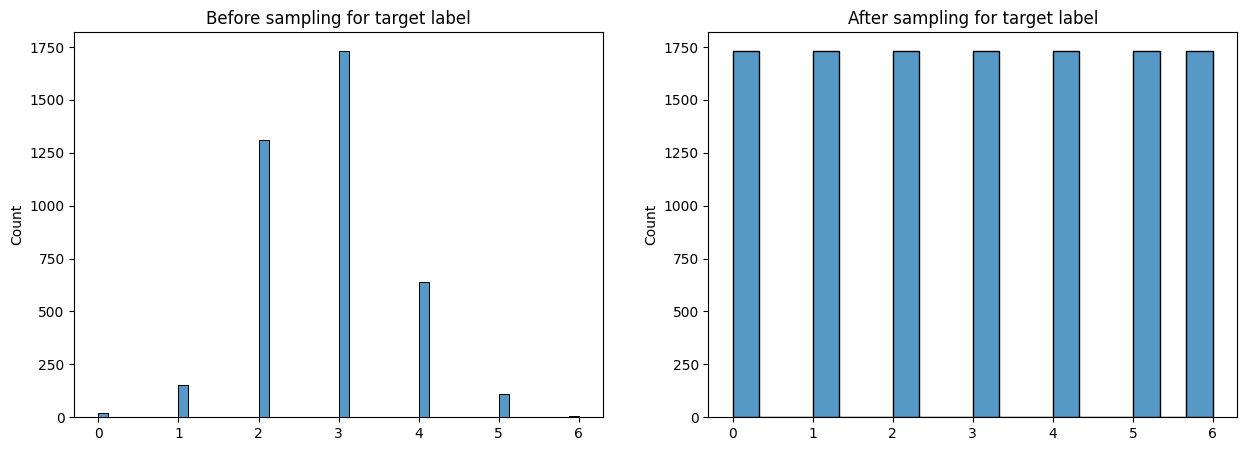

In [8]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_sm_sampling)
plt.title("After sampling for target label")

### 3. Class Imbalance - ADASYN (Adaptive Synthetic Sampling)

- 소수 클래스 데이터 포인트들을 기존 데이터를 활용하여 데이터를 균형화하는 방법
- 소수 클래스 데이터 포인트의 가중치를 계산하고, 높은 가중치를 가지는 데이터 포인트에 대해 더 많은 합성을 수행
- 가중치는 데이터 분포와 클래스 간 거리에 따라 동적으로 조정 (거리가 가까운 데이터 포인트에 대한 합성이 더욱 강조됨)
- 장점: 데이터분포(거리)에 더욱 더 가중되며, 클래스 간 거리에 따라 합성을 조절하여 불균형을 더 효과적으로 다룰 수 있음
- 단점: SMOTE에 비해 더 복잡하며 계산 비용이 높을 수 있음

In [12]:
ada = ADASYN(random_state=42, n_neighbors=3)
x_ada_sampling, y_ada_sampling = ada.fit_resample(x_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

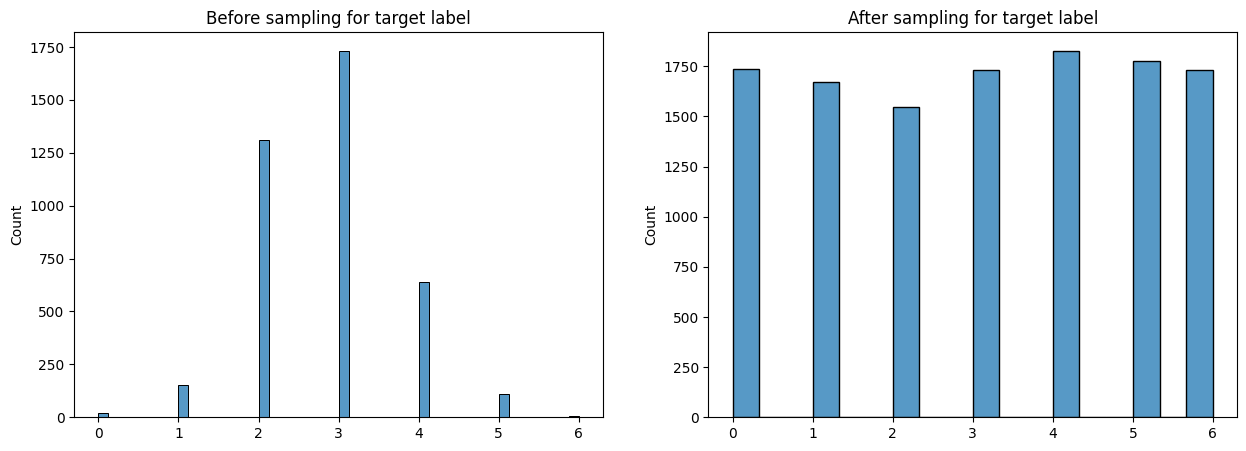

In [13]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_ada_sampling)
plt.title("After sampling for target label")